In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
epil_df = pd.read_csv('datasets/epil.csv', sep=',')
epil_df.head()

,Unnamed: 0,y,trt,base,age,V4,subject,period,lbase,lage
0,1,5,placebo,11,31,0,1,1,-0.756354,0.114204
1,2,3,placebo,11,31,0,1,2,-0.756354,0.114204
2,3,3,placebo,11,31,0,1,3,-0.756354,0.114204
3,4,3,placebo,11,31,1,1,4,-0.756354,0.114204
4,5,3,placebo,11,30,0,2,1,-0.756354,0.081414


In [4]:
seizure_df = pd.read_csv('datasets/seizure (1).csv', sep=',')
seizure_df.head()

,Unnamed: 0,y1,y2,y3,y4,trt,base,age
0,1,5,3,3,3,0,11,31
1,2,3,5,3,3,0,11,30
2,3,2,4,0,5,0,6,25
3,4,4,4,1,4,0,8,36
4,5,7,18,9,21,0,66,22


(1, 110)

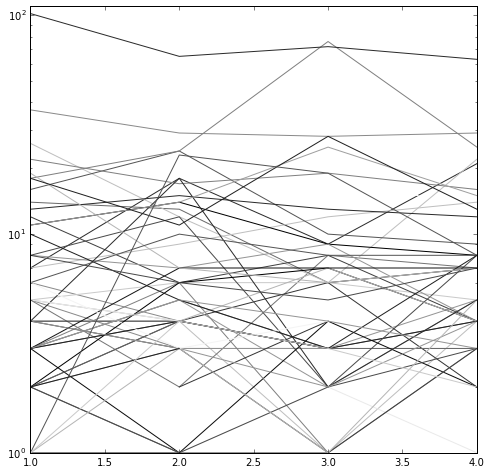

In [57]:
fig = plt.figure(figsize=(8,8))

min_age, max_age = epil_df['age'].min(), epil_df['age'].max()
age_range = max_age - min_age

for subj_id in set(epil_df['subject'].values):
    subj_df = epil_df[epil_df['subject'] == subj_id]
    color_fac = (float(subj_df['age'].iloc[0]) - min_age) / age_range
    plt.semilogy(subj_df['period'], subj_df['y'], color=(color_fac, color_fac, color_fac))
    
plt.ylim(1, 110)
plt.xlabel('Period')
plt.ylabel('Seizures')

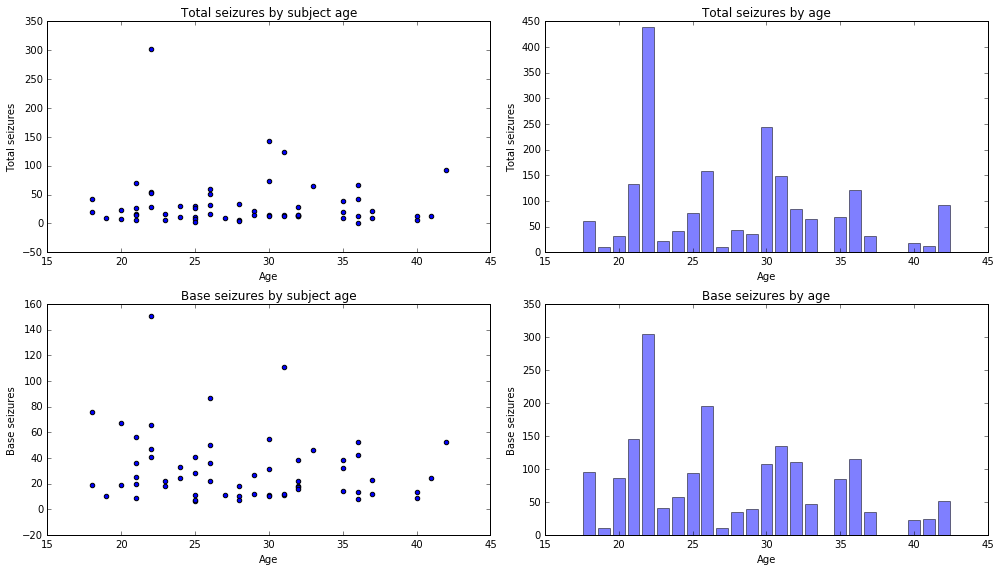

In [93]:
sum_by_subj = epil_df.groupby(['subject']).sum()
counts_by_subj = sum_by_subj['y']
age_by_subj = sum_by_subj['age'] / 4.
base_by_subj = sum_by_subj['base'] / 4.

seizures_by_age =  epil_df.groupby(['age']).sum()['y']
base_by_age =  epil_df.groupby(['age']).sum()['base'] / 4.

fig, ax = plt.subplots(2, 2, figsize=(14,8))

ax[0][0].scatter(age_by_subj, counts_by_subj)
ax[0][0].set_xlabel('Age')
ax[0][0].set_ylabel('Total seizures')
ax[0][0].set_title('Total seizures by subject age')

ax[0][1].bar(seizures_by_age.index, seizures_by_age, align='center', alpha=0.5)
ax[0][1].set_xlabel('Age')
ax[0][1].set_ylabel('Total seizures')
ax[0][1].set_title('Total seizures by age')

ax[1][0].scatter(age_by_subj, base_by_subj)
ax[1][0].set_xlabel('Age')
ax[1][0].set_ylabel('Base seizures')
ax[1][0].set_title('Base seizures by subject age')

ax[1][1].bar(seizures_by_age.index, base_by_age, align='center', alpha=0.5)
ax[1][1].set_xlabel('Age')
ax[1][1].set_ylabel('Base seizures')
ax[1][1].set_title('Base seizures by age')

plt.tight_layout()
plt.show()

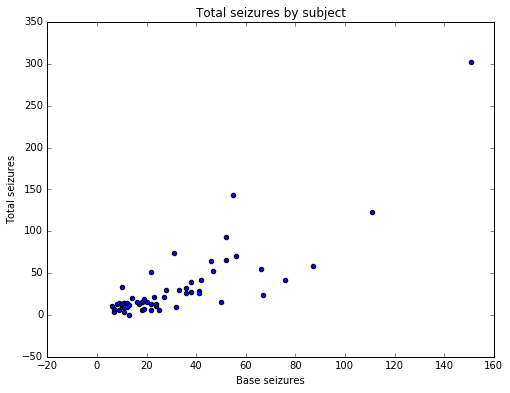

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.scatter(base_by_subj, counts_by_subj)
ax.set_xlabel('Base seizures')
ax.set_ylabel('Total seizures')
ax.set_title('Total seizures by subject')

plt.show()

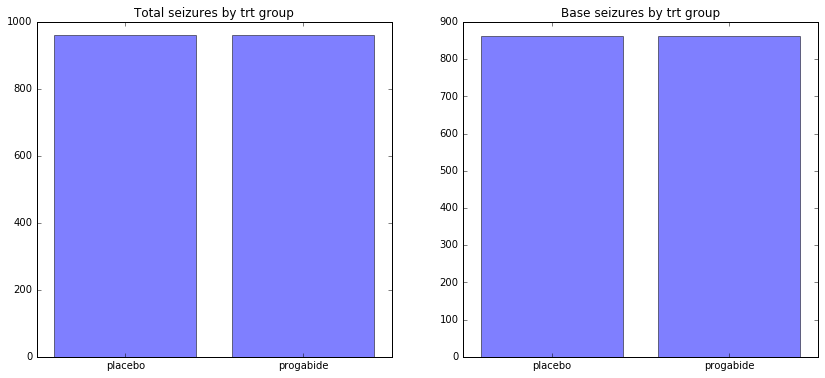

In [107]:
placebo_group = epil_df[epil_df['trt'] == 'placebo']
progabide_group = epil_df[epil_df['trt'] == 'progabide']

seizures_placebo = placebo_group.sum()['y']
seizures_progabide = placebo_group.sum()['y']

base_placebo = placebo_group.sum()['base'] / 4.
base_progabide = placebo_group.sum()['base'] / 4.

fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].bar([1, 2], [seizures_placebo, seizures_progabide], align='center', alpha=0.5)
ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(['placebo', 'progabide'])
ax[0].set_title('Total seizures by trt group')

ax[1].bar([1, 2], [base_placebo, base_progabide], align='center', alpha=0.5)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['placebo', 'progabide'])
ax[1].set_title('Base seizures by trt group')

plt.show()